In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

In [0]:
confirmed_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

## Loading from Local PC

In [0]:
recovered = pd.read_csv(recovered_link)
death = pd.read_csv(death_link)
confirmed = pd.read_csv(confirmed_link)
country = pd.read_csv(country_link)

In [5]:
print('Shape of recovered is {} \nShape of death is {} \nShape of confirmed is {} \nShape of country is {}'.format(recovered.shape, death.shape, confirmed.shape, country.shape))

Shape of recovered is (253, 145) 
Shape of death is (266, 145) 
Shape of confirmed is (266, 145) 
Shape of country is (188, 14)


## Exploratory Data Analysis

### total confirmed, death, recovered and active in the world

In [6]:
country_drca = country.loc[:,['Confirmed','Deaths','Recovered','Active']]
country_drca.head()

,Confirmed,Deaths,Recovered,Active
0,7285.0,102.0,6761.0,422.0
1,17005.0,673.0,15910.0,422.0
2,98720.0,8038.0,57215.0,33468.0
3,84209.0,4638.0,79457.0,114.0
4,12216.0,593.0,11104.0,519.0


In [7]:
pd.DataFrame(country_drca.sum()).transpose()

,Confirmed,Deaths,Recovered,Active
0,7394801.0,417022.0,3476083.0,3451382.0


### Most 10 infected country

In [8]:
country_infected = country.loc[:,['Country_Region','Confirmed','Deaths','Recovered','Active']]
country_infect = country_infected.sort_values('Confirmed', ascending=False).reset_index(drop=True).head(10)
country_infect

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,2000464.0,112924.0,533504.0,1303721.0
1,Brazil,772416.0,39680.0,413916.0,318820.0
2,Russia,501800.0,6522.0,260649.0,234629.0
3,United Kingdom,291588.0,41213.0,1269.0,249106.0
4,India,286576.0,8102.0,141017.0,137457.0
5,Spain,242280.0,27136.0,150376.0,64768.0
6,Italy,235763.0,34114.0,169939.0,31710.0
7,Peru,208823.0,5903.0,98031.0,104889.0
8,France,192068.0,29322.0,71952.0,90794.0
9,Germany,186525.0,8768.0,170830.0,6927.0


Text(0.5, 1.0, 'Confirmed in 10 country inclueding US')

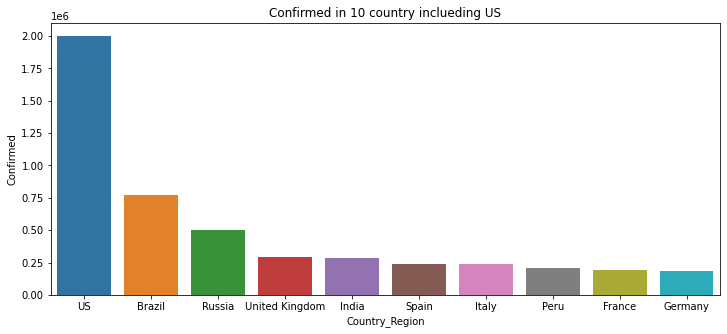

In [9]:
plt.figure(figsize=(12,5))
sns.barplot(x=country_infect['Country_Region'], y=country_infect['Confirmed'])
plt.title('Confirmed in 10 country inclueding US')

### 10 most death country

In [10]:
country_infect = country_infected.sort_values('Deaths', ascending=False).reset_index(drop=True).head(10)
country_infect

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,2000464.0,112924.0,533504.0,1303721.0
1,United Kingdom,291588.0,41213.0,1269.0,249106.0
2,Brazil,772416.0,39680.0,413916.0,318820.0
3,Italy,235763.0,34114.0,169939.0,31710.0
4,France,192068.0,29322.0,71952.0,90794.0
5,Spain,242280.0,27136.0,150376.0,64768.0
6,Mexico,129184.0,15357.0,93930.0,19897.0
7,Belgium,59711.0,9636.0,16453.0,33622.0
8,Germany,186525.0,8768.0,170830.0,6927.0
9,Iran,177938.0,8506.0,140590.0,28842.0


Text(0.5, 1.0, 'most 10 death country')

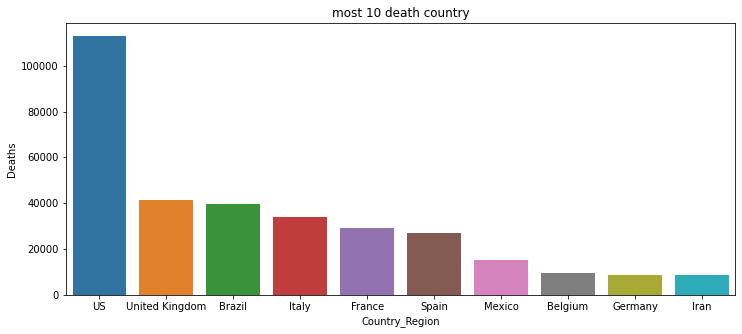

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(x=country_infect['Country_Region'], y=country_infect['Deaths'])
plt.title('most 10 death country')

### Infection in 20 Country

In [12]:
country_confirm = confirmed.loc[:,['Country/Region','6/3/20']].set_index('Country/Region').sort_values('6/3/20', ascending=False).head(20)
country_confirm

,6/3/20
Country/Region,
US,1851520
Brazil,584016
Russia,431715
United Kingdom,279856
Spain,240326
Italy,233836
India,216824
France,188836
Germany,184121


In [13]:
fig = px.line(x=country_confirm.index, y=country_confirm.values, title='Death in USA')
fig.show()

### Covid-19 Confirmed Globaly

In [14]:
confir = confirmed.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
confirmed_ts_sum = confir.sum()
confirmed_ts_sum

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
6/6/20     6901877
6/7/20     7015312
6/8/20     7119002
6/9/20     7236054
6/10/20    7360239
Length: 141, dtype: int64

In [15]:
fig_1 = go.Figure(data=go.Scatter(x=confirmed_ts_sum.index, y = confirmed_ts_sum.values, mode='lines+markers'))
fig_1.update_layout(title='Total Coronavirus Confirmed Cases (Globally)',
                  yaxis_title='Confirmed Cases', xaxis_tickangle = 315 )
fig_1.show()

### Total Infection in Day In USA

In [16]:
confirm = confirmed[confirmed['Country/Region']=='US'].drop(['Country/Region','Province/State','Lat','Long'], axis=1).transpose()
confirm.columns = ['infection']
confirm

,infection
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
6/6/20,1925765
6/7/20,1943882
6/8/20,1961428
6/9/20,1973230


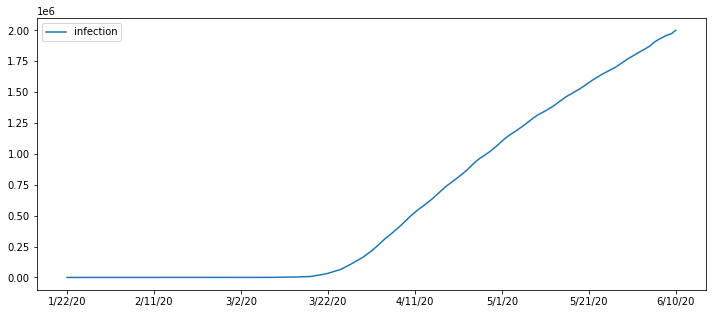

In [17]:
confirm.plot(figsize=(12,5))

### Total Death in Day In USA

In [18]:
confirm = death[death['Country/Region']=='US'].drop(['Country/Region','Province/State','Lat','Long'], axis=1).transpose()
confirm.columns = ['death']
confirm

,death
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
6/6/20,110068
6/7/20,110511
6/8/20,111011
6/9/20,111989


In [19]:
fig = px.line(confirm, x=confirm.index, y=confirm.values, title='Death in USA')
fig.show()

### Covid 19 case trend for world¶

In [0]:
# Initializing Color Array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

In [0]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
    # base x_axis prop.
    x_axis_dict = dict(showline=True, 
                       showgrid=True, 
                       showticklabels=True, 
                       linecolor='rgb(204, 204, 204)', 
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',))
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
    
    # base y_axis prop.
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
    # setting y_axis params
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title


#updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
                     )

    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                            text=title,
                            font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    
    #updating the layout
    fig.update_layout(annotations=annotations)

    return fig

In [0]:
confimed_agg_ts = confirmed.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
death_agg_ts = death.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
recovered_agg_ts = recovered.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(confimed_agg_ts.values,death_agg_ts.values, recovered_agg_ts.values)]),
    index= confimed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [23]:
ts_array = [confimed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Status(22nd Jan to 3rd June 2020)",
                  colors = colors, 
                  mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", 
                  additional_annotations=[])

fig_2.show()

In [24]:
country.copy().drop(
    ['Lat','Long_','Last_Update', 'Incident_Rate', 'People_Tested', 'People_Hospitalized','UID', 'ISO3'],axis =1).sort_values('Confirmed', ascending= False).reset_index(drop=True).style.bar(
    align="left",width=98,color='#d65f5f')

,Country_Region,Confirmed,Deaths,Recovered,Active,Mortality_Rate
0,US,2000464.000000,112924.000000,533504.000000,1303721.000000,5.644890
1,Brazil,772416.000000,39680.000000,413916.000000,318820.000000,5.137128
2,Russia,501800.000000,6522.000000,260649.000000,234629.000000,1.299721
3,United Kingdom,291588.000000,41213.000000,1269.000000,249106.000000,14.133984
4,India,286576.000000,8102.000000,141017.000000,137457.000000,2.827173
5,Spain,242280.000000,27136.000000,150376.000000,64768.000000,11.200264
6,Italy,235763.000000,34114.000000,169939.000000,31710.000000,14.469616
7,Peru,208823.000000,5903.000000,98031.000000,104889.000000,2.826796
8,France,192068.000000,29322.000000,71952.000000,90794.000000,15.266468
9,Germany,186525.000000,8768.000000,170830.000000,6927.000000,4.700710


### Covid-19 Case Trend in USA

In [0]:
confirmed_usa_ts = confirmed[confirmed['Country/Region']=="US"]
confirmed_usa_ts = confirmed_usa_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

deaths_usa_ts = death[death['Country/Region']=="US"]
deaths_usa_ts = deaths_usa_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

recovered_usa_ts = recovered[recovered['Country/Region']=="US"]
recovered_usa_ts = recovered_usa_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

active_usa_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(
            confirmed_usa_ts.values,deaths_usa_ts.values, recovered_usa_ts.values)
        ] 
    ), 
    index= confirmed_usa_ts.index
)

In [26]:
ts_array = [confirmed_usa_ts, active_usa_ts, recovered_usa_ts, deaths_usa_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Trend in INDIA",
                  colors = colors, 
                  mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_3.show()

### Covid-19 Transmission Timeline in USA - 03/16/2020 Onwards

In [27]:
#Just need to change the ts_array
ts_array = [confirmed_usa_ts[54:], active_usa_ts[54:], recovered_usa_ts[54:], deaths_usa_ts[54:]]
fig_4 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Transmission Timeline in USA - 03/16/2020 Onwards",
                  colors = colors, 
                  mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", 
                  additional_annotations=[])

fig_4.show()

### Semi-Log Plot of Covid-19 Transmission Timeline in USA - 03/16/2020 Onwards¶

In [28]:
fig_5 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Semi-Log Plot of Covid-19 Transmission Timeline in USA - 03/16/2020 Onwards",
                  colors = colors, 
                  mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "log", 
                  additional_annotations=[])

fig_5.show()

## Modeling & Prediction

In [0]:
# Imports required
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [0]:
START_DATE = {
  'Italy': '1/31/20',
  'India': '1/30/20'
}
class Learner(object):
    def __init__(self, country, loss, start_date ='1/22/20', predict_range=150,s_0=100000, i_0=2, r_0=10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv(confirmed_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv(recovered_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_dead(self, country):
        df = pd.read_csv(death_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(
            loss, 
            [0.001, 0.001], 
            args=(data, recovered, self.s_0, self.i_0, self.r_0), 
            method='L-BFGS-B', 
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [0]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2


### For USA

In [0]:
usa_learner = Learner(country="US", loss= loss)

      fun: 202775.22028430807
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.16007107, -1.30676199])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 6
   status: 0
  success: True
        x: array([0.39776425, 0.02226315])
country=US, beta=0.39776425, gamma=0.02226315, r_0:17.86648911


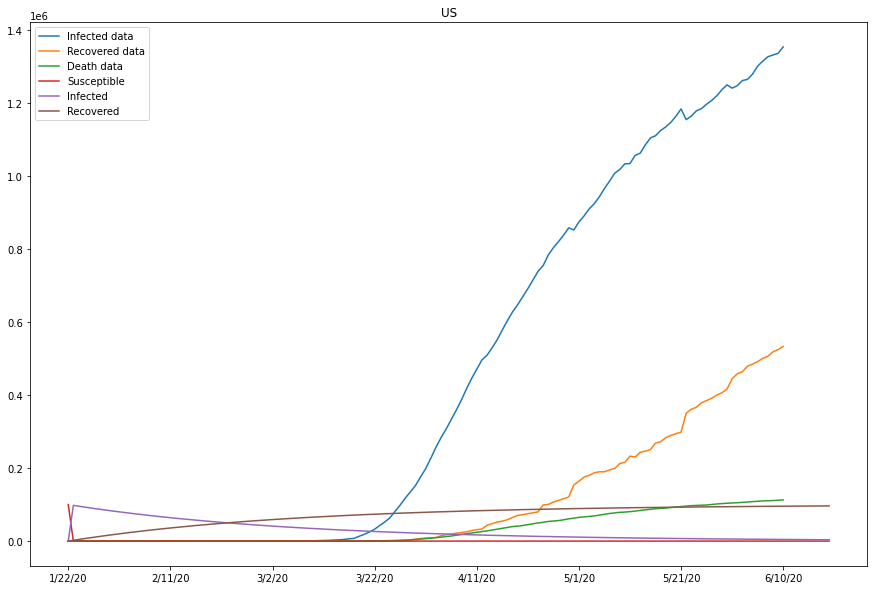

In [33]:
usa_df, usa_fig = usa_learner.train()

### For Italy

In [0]:
italy_learner = Learner(country="Italy", loss= loss, i_0= 3)

      fun: 28458.364373327167
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.89882982e+03,  1.03464117e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 303
      nit: 31
   status: 0
  success: True
        x: array([2.08751110e-06, 5.05465129e-02])
country=Italy, beta=0.00000209, gamma=0.05054651, r_0:0.00004130


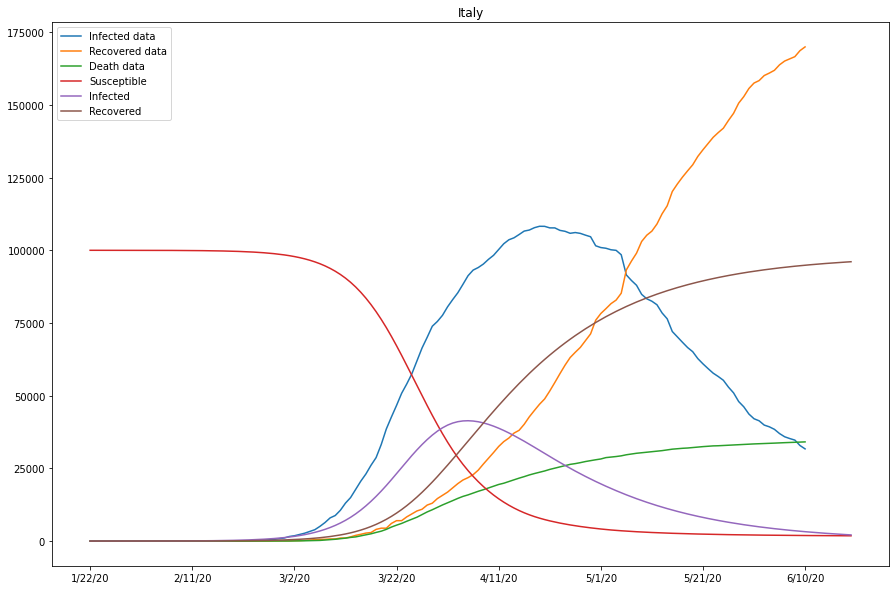

In [35]:
italy_sir , italy_sir_fig = italy_learner.train()

### Either read from file India.csv or directly from the dataframe returned in above function call

In [0]:
italy_sir = italy_sir[:77]

In [0]:
def plot_sir_prediction(title, df_sir, remove_series=[],yaxis_type="", yaxis_title=""):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Recovered data', 'Death data', 'Susceptible','Infected','Recovered']
    colors = [color_arr[0], color_arr[8], color_arr[2], color_arr[3],color_arr[7], color_arr[16]]
    line_size = [2, 2, 2, 2, 2, 2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index, 
                                           y = df_sir[data_series], 
                                           name = labels[index],
                                           line=dict(
                                               color=colors[index], 
                                               width=line_size[index]),
                                           connectgaps=True,))
    xaxis= dict(
        title = "Date",
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickangle = 280,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',),)
    yaxis = dict(
        title = "Case Count",
        showline = True,
        showgrid = True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,)
    
    if yaxis_type!="":
        yaxis['type'] = yaxis_type
    
    if yaxis_title !="":
        yaxis['title'] = yaxis_title
    
    fig.update_layout(
        xaxis = xaxis,
        yaxis = yaxis,
        autosize=True,
        margin=dict(autoexpand=True,l=100,r=20,t=110,),
        showlegend=True)

    annotations = []

    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=16,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

    fig.update_layout(annotations=annotations)
    
    return fig

### For Chart : SIR Model -- Covid-19 Transmission -- Prediction -- Italy

In [38]:
fig_8 = plot_sir_prediction(title="SIR Model --  Covid-19 Transmission -- Prediction -- USA", df_sir= italy_sir)
fig_8.show()

In [39]:
# to remove the "Susceptible" series just pass the series name to remove_series
fig_8 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- Italy", 
    df_sir= italy_sir,
    remove_series=['Susceptible'])

fig_8.show()


### For Chart 9 : SIR Model -- Covid-19 Transmission -- Prediction -- Italy | Case Count (Log Scale)

In [40]:
fig_9 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- USA", 
    df_sir= italy_sir,
    remove_series=['Susceptible'],
    yaxis_type="log",
    yaxis_title="Case Count (Log Scale)")

fig_9.show()
